서울시 구별 커피점 개수, 서울시 구별 스타벅스 개수를 분석해봤습니다. :)

In [34]:
# Pandas, Plotnine 소환!

!pip install plotnine

import pandas as pd
from plotnine import *

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [44]:
# 한글 폰트 정보도 소환!

import matplotlib.font_manager as fm
fontpath = 'C:\\WINDOWS\\Fonts\\NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [5]:
# 현재 경로는?

%pwd

'C:\\Users\\Louise\\Documents\\GitHub\\open-data-shop'

In [4]:
# 현재 경로의 파일은?

%ls data

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 4484-378F

 C:\Users\Louise\Documents\GitHub\open-data-shop\data 디렉터리

2018-08-09  오후 03:35    <DIR>          .
2018-08-09  오후 03:35    <DIR>          ..
2018-07-25  오후 02:53       212,900,223 shop_201806_01.csv
2018-07-25  오후 03:00       197,851,676 shop_201806_02.csv
2018-07-25  오후 04:58       336,210,823 shop_201806_03.csv
2018-07-25  오후 04:36       305,842,209 shop_201806_04.csv
               4개 파일       1,052,804,931 바이트
               2개 디렉터리  223,737,081,856 바이트 남음


In [9]:
# 일단 데이터 불러오고...

df_shop = pd.read_csv('data/shop_201806_01.csv', encoding='cp949')

In [10]:
df_shop.shape

(476183, 39)

In [12]:
df_shop.head(10)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,...,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315
5,28485115,만포장횟집,NaN,Q,음식,Q03,일식/수산물,Q03A01,횟집,I56111,...,2647010100114760007022096,대왕빌딩,부산광역시 연제구 법원북로3번길 15,611070,47502.0,NaN,1,NaN,129.067294,35.193906
6,28501818,미처버린파닭양정점,양정점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2623010100103500061035283,NaN,부산광역시 부산진구 중앙대로910번길 15,614050,47222.0,NaN,1,NaN,129.070871,35.171033
7,28523926,하이마트키즈부산롯데마트점,키즈부산롯데마트점,D,소매,D12,가전제품소매,D12A01,일반가전제품,G47320,...,2623010800102400000000001,롯데키즈마트,부산광역시 부산진구 신천대로 241,614090,47187.0,NaN,2,NaN,129.049343,35.163325
8,11720327,국대떡볶이길음역점,길음역점,Q,음식,Q04,분식,Q04A03,떡볶이전문,I56194,...,1129013400112760000026337,삼부아파트,서울특별시 성북구 동소문로 248,136757,2735.0,NaN,2,NaN,127.024543,37.603455
9,28503249,아리따움IFC점,IFC점,D,소매,D16,화장품소매,D16A01,화장품판매점,G47813,...,1156011000100020006000001,여의도역,서울특별시 영등포구 의사당대로 101,150010,7327.0,NaN,1,NaN,126.923949,37.521893


In [21]:
df_shop['상권업종소분류명'].value_counts().head(10)

한식/백반/한정식      34155
여성미용실          21902
커피전문점/카페/다방    18759
부동산중개          16298
일반의류           13499
편의점            11018
호프/맥주           9774
라면김밥분식          9079
학원-입시           8418
세탁소/빨래방         7575
Name: 상권업종소분류명, dtype: int64

In [25]:
# 상권업종소분류명이 커피전문점/카페/다방인 곳만 골라낸 다음에,

df_coffee = df_shop.loc[df_shop['상권업종소분류명'] == '커피전문점/카페/다방']

In [27]:
# 지역이 서울인 것만 다시 한 번 골라내서,

df_coffee_seoul = df_coffee.loc[df_coffee['도로명주소'].str.startswith('서울')]

In [28]:
df_coffee_seoul.tail(10)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
475758,16150023,벨벳문,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1111011300101700000029030,NaN,서울특별시 종로구 자하문로5길 39,110054,3041.0,NaN,NaN,NaN,126.969654,37.577697
475872,16149275,카페24창업센터,염창점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1147010200105470012019805,NaN,서울특별시 양천구 목동중앙본로 95,158809,7953.0,NaN,NaN,NaN,126.870374,37.544189
475926,16107833,롯데푸드파스퇴르밀크바,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1138011400100610000000001,롯데몰은평점,서울특별시 은평구 통일로 1050,122200,3306.0,NaN,4,NaN,126.917887,37.637531
475931,16122855,아더카페,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1144012000103640006010318,NaN,서울특별시 마포구 와우산로19길 16,121893,4041.0,NaN,NaN,NaN,126.922336,37.551433
475940,16112876,간단하지만특별한화피디Cafe,화이트파이어,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114013900100790010018521,NaN,서울특별시 중구 필동로 76,100273,4622.0,NaN,NaN,NaN,126.996078,37.554894
476013,16143874,간단하지만특별한화피디Cafe,공원옆,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1120010900105150000000001,신세계오피스텔,서울특별시 성동구 행당로 6,133800,4727.0,NaN,1,NaN,127.020734,37.554470
476029,16093468,코칭,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1144012000103450002010100,NaN,서울특별시 마포구 어울마당로 118,121837,4055.0,NaN,NaN,NaN,126.923438,37.555038
476094,16112473,알콩커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1141010100101240000029691,NaN,서울특별시 서대문구 충정로 73,120012,3736.0,NaN,1,NaN,126.965908,37.565302
476102,16133691,프라빈커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100107350022000001,GALA빌딩,서울특별시 강남구 논현로85길 46,135923,6235.0,NaN,1,NaN,127.034270,37.498266
476176,16093217,돌담커피,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1144012000103340017009980,NaN,서울특별시 마포구 와우산로29라길 25,121836,4053.0,NaN,NaN,NaN,126.926793,37.554735


In [31]:
# 시도 / 구군 칼럼을 새로 추가함.

df_coffee_seoul['시도'] = df_coffee_seoul['도로명주소'].str.split(' ', expand=True)[0]
df_coffee_seoul['구군'] = df_coffee_seoul['도로명주소'].str.split(' ', expand=True)[1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


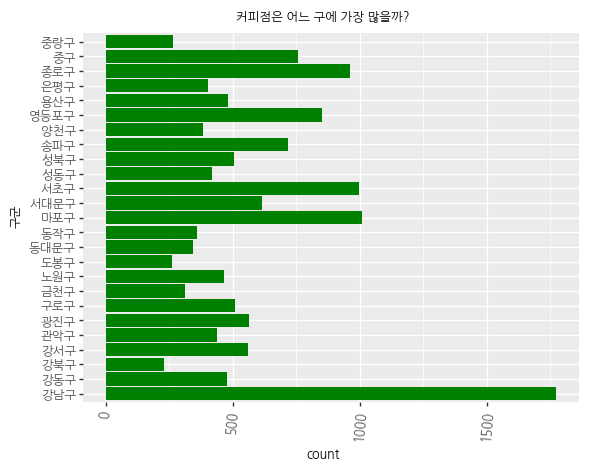

<ggplot: (92822980279)>

In [45]:
# 커피점은 어느 구에 가장 많을까?

(ggplot(df_coffee_seoul)
 + aes('구군')
 + geom_bar(fill='green')
 + ggtitle('커피점은 어느 구에 가장 많을까?')
 + coord_flip()
 + theme(text=element_text(fontproperties=font),
        axis_text_x=element_text(rotation=85))
)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\guides\guides.py:199: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


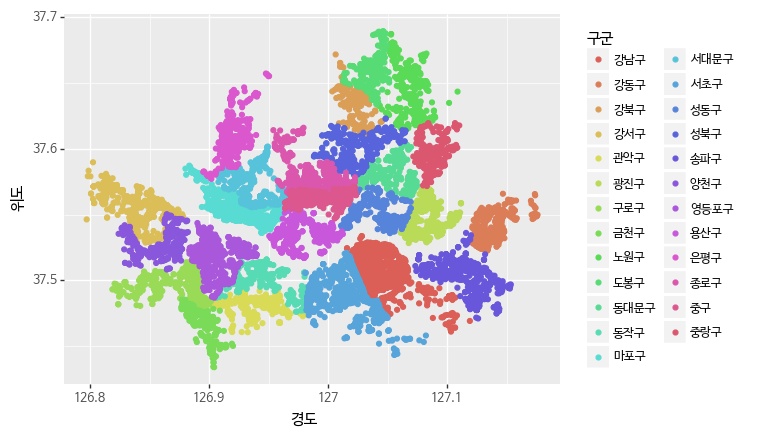

<ggplot: (-9223371944032450083)>

In [36]:
# 지도에 뿌려보자~

(ggplot(df_coffee_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green')
)

In [47]:
# 스타벅스만 가지고 와보기로 했다. (스타벅스 골드 회원의 쓸데없는 부심질)

df_starbucks = df_coffee_seoul.loc[df_coffee_seoul['상호명'].str.contains('스타벅스|Starbucks')]
df_starbucks.loc[df_starbucks['상호명'].str.contains('스타벅스|Starbucks'),'브랜드명'] = '스타벅스'

df_starbucks.head(15)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,시도,구군,브랜드명
1682,19998811,스타벅스종로3가점,종로3가점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,110123,3139.0,NaN,1,NaN,126.990207,37.570585,서울특별시,종로구,스타벅스
12518,20283351,스타벅스커피여의도IFC1F,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,150945,7326.0,NaN,3,NaN,126.924863,37.525172,서울특별시,영등포구,스타벅스
12543,20288646,스타벅스,삼성역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,135090,6173.0,NaN,1,NaN,127.063878,37.510038,서울특별시,강남구,스타벅스
13302,20597950,스타벅스,신림포도몰점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,151930,8777.0,NaN,1,NaN,126.930216,37.483845,서울특별시,관악구,스타벅스
13384,20825451,스타벅스신림사거리점,신림사거리점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,151890,8754.0,NaN,2,NaN,126.930487,37.484631,서울특별시,관악구,스타벅스
23885,23242282,스타벅스커피홍대역,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,121756,3995.0,NaN,1,NaN,126.923599,37.557202,서울특별시,마포구,스타벅스
31378,25467314,스타벅스,신사역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,135010,6038.0,NaN,1,NaN,127.020635,37.516184,서울특별시,강남구,스타벅스
33196,25539473,스타벅스새문안로점,새문안로점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,110999,3186.0,NaN,1,NaN,126.974869,37.569723,서울특별시,종로구,스타벅스
34199,25580127,스타벅스,까치산역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,157010,7774.0,NaN,1,NaN,126.846036,37.532285,서울특별시,강서구,스타벅스
34292,25576902,스타벅스올림픽평화의문점,올림픽평화의문점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,138050,5627.0,NaN,1,NaN,127.116317,37.515785,서울특별시,송파구,스타벅스


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


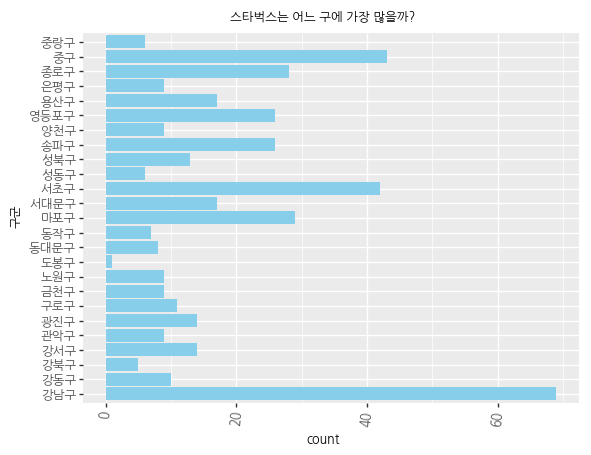

<ggplot: (-9223371944030972693)>

In [54]:
# 스타벅스는 어떤 구에 가장 많을까?

(ggplot(df_starbucks)
 + aes('구군')
 + geom_bar(fill='skyblue')
 + ggtitle('스타벅스는 어느 구에 가장 많을까?')
 + coord_flip()
 + theme(text=element_text(fontproperties=font),
        axis_text_x=element_text(rotation=85))
)

In [51]:
import folium

In [52]:
# Folium 으로 지도상에 스타벅스 위치를 뿌려보자.

map = folium.Map(location=[df_starbucks['위도'].mean(), df_starbucks['경도'].mean()], zoom_start=12)

for n in df_starbucks.index:
    
    # 팝업에 들어갈 텍스트 지정
    popup_name = df_starbucks['브랜드명'][n] + ' - ' + df_starbucks['도로명주소'][n]
    
    # 아이콘 색상 설정
    if df_starbucks['브랜드명'][n] == '스타벅스':
        icon_color = 'green'
    else:
        icon_color = 'blue'
        
    folium.Marker([df_starbucks['위도'][n], df_starbucks['경도'][n]],
                   popup=popup_name,
                   icon=folium.Icon(color=icon_color)).add_to(map)
    
map

In [53]:
# 지점명 없는 데이터가 왜 이래 많노... (부들부들)

df_starbucks.isnull().sum()

상가업소번호         0
상호명            0
지점명           30
상권업종대분류코드      0
상권업종대분류명       0
상권업종중분류코드      0
상권업종중분류명       0
상권업종소분류코드      0
상권업종소분류명       0
표준산업분류코드       0
표준산업분류명        0
시도코드           0
시도명            0
시군구코드          0
시군구명           0
행정동코드          0
행정동명           0
법정동코드          0
법정동명           0
지번코드           0
대지구분코드         0
대지구분명          0
지번본번지          0
지번부번지        101
지번주소           0
도로명코드          0
도로명            0
건물본번지          0
건물부번지        416
건물관리번호         0
건물명           98
도로명주소          0
구우편번호          0
신우편번호          0
동정보          425
층정보           50
호정보          389
경도             0
위도             0
시도             0
구군             0
브랜드명           0
dtype: int64